# Classificação de dígitos usando rede neural densa (DNN)

Dupla: Pedro Figueira e Vinicius Gabriel

## Importando Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Dataset

### Sobre o dataset

Conjunto de dados de dígitos manuscritos **MNIST**

O banco de dados MNIST de dígitos manuscritos, disponível nesta [página](http://yann.lecun.com/exdb/mnist/), possui um conjunto de treinamento de 60.000 imagens em escala de cinza 28x28 dos 10 dígitos ao longo de um conjunto de teste de 10.000 imagens. Os dígitos foram normalizados em tamanho e centralizados em uma imagem de tamanho fixo.

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

### Carregar e explorar conjunto de dados


In [ ]:
data = tf.keras.datasets.mnist

(training_images, training_labels), (val_images, val_labels) = data.load_data()

In [ ]:
# Serão 60.000 imagens de 28px 28px para o treinamento da arquitetura
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
# Serão 10.000 imagens de 28px 28px para o treinamento da arquitetura
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 178 255 105   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   6 188 253 216  14   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  14 202 253 253  23   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12 199 253 128   6   0   

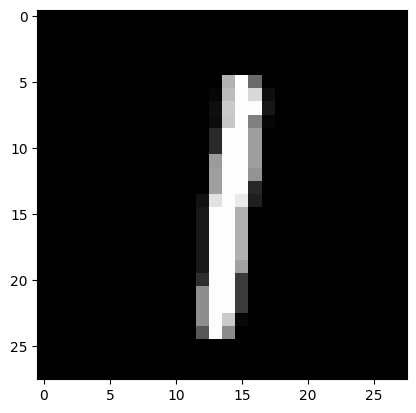

In [ ]:
# Testando os números
indice_teste = 40
np.set_printoptions(linewidth=200)
print(training_images[indice_teste])
plt.imshow(training_images[indice_teste], cmap='gray')
print("\nEsse é o número: ", training_labels[indice_teste])

In [ ]:
print("Range of values of pixels in image:", training_images.min(), "px - ", training_images.max(), "px")

Range of values of pixels in image: 0 px -  255 px


### Normalização dos dados

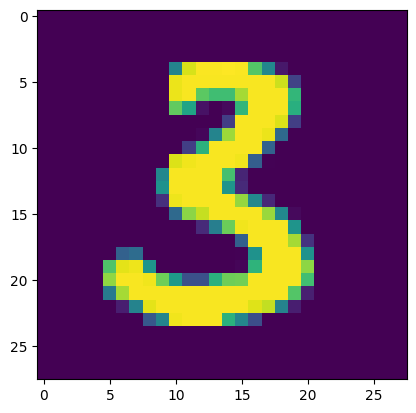

In [ ]:
# A normalizando os dados de acordo com o tamanho máximo dos valores, isso deixará os valores de 0.0 a 1.0
# Nesse caso 0 é branco e 1 é preto
max_size = training_images.max()

training_images  = training_images / max_size
val_images = val_images / max_size

# Pode se inserir valores de 0 a 59999
test_image = 4233
plt.imshow(training_images[test_image]);

## Compilando o modelo

In [ ]:
# Definindo os modelos
# A arquitetura 1 tem 1 camada, a arquitetura 2 tem 2 camadas e a arquitetura 3 tem 3 camadas
# O modelo 1 tem 10 neurônios, o modelo 2 tem 20 neurônios e o modelo 3 tem 30 neurônios
# A variação 1 é a Relu, já a variação 2 é Tanh
# Haverá um total de 18 modelos

# Arquitetura 1
A1M1V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), # 28px por 28px
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # números de 0-9 e softmax para deixar a curva mais 'soft', menos brusca

A1M1V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M2V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M2V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M3V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M3V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# Arquitetura 2
A2M1V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M1V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M2V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M2V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M3V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M3V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# Arquitetura 3
A3M1V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M1V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M2V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M2V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M3V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M3V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M1V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
    )

A1M1V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M2V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M2V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M3V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M3V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M1V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M1V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M2V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M2V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M3V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M3V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M1V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M1V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M2V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M2V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M3V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M3V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

## Treinando os modelos

Leva um tempo para treinamento, execute com cuidado

### Starting array for saving the models history

In [ ]:
# O indice vai de 0 - 17

models_history = []

### Arquitecture 1

In [ ]:
%%time
A1M1V1_history = A1M1V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A1M1V1_history)

A1M1V2_history = A1M1V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A1M1V2_history)

A1M2V1_history = A1M2V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A1M2V1_history)

A1M2V2_history = A1M2V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A1M2V2_history)

A1M3V1_history = A1M3V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A1M2V1_history)

A1M3V2_history = A1M3V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A1M3V2_history)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5136 - accuracy: 0.8525
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.9178
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2658 - accuracy: 0.9246
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2531 - accuracy: 0.9279
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2443 - accuracy: 0.9314
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2385 - accuracy: 0.9320
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2336 - accuracy: 0.9340
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2280 - accuracy: 0.9353
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2237 - accuracy: 0.9363
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.220

### Arquitecture 2

In [ ]:
%%time
A2M1V1_history = A2M1V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A2M1V1_history)

A2M1V2_history = A2M1V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A2M1V2_history)

A2M2V1_history = A2M2V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A2M2V1_history)

A2M2V2_history = A2M2V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A2M2V2_history)

A2M3V1_history = A2M3V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A2M3V1_history)

A2M3V2_history = A2M3V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A2M3V2_history)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5823 - accuracy: 0.8257
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3029 - accuracy: 0.9148
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2609 - accuracy: 0.9257
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2390 - accuracy: 0.9322
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2267 - accuracy: 0.9345
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2168 - accuracy: 0.9374
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2091 - accuracy: 0.9386
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2031 - accuracy: 0.9402
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1974 - accuracy: 0.9419
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.195

### Arquitecture 3

In [ ]:
%%time
A3M1V1_history = A3M1V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A3M1V1_history)

A3M1V2_history = A3M1V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A3M1V2_history)

A3M2V1_history = A3M2V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A3M2V1_history)

A3M2V2_history = A3M2V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A3M2V2_history)

A3M3V1_history = A3M3V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A3M3V1_history)

A3M3V2_history = A3M3V2.fit(
    training_images,
    training_labels,
    epochs=20,
    )
models_history.append(A3M3V2_history)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6763 - accuracy: 0.7969
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3273 - accuracy: 0.9075
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2820 - accuracy: 0.9206
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2565 - accuracy: 0.9261
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2421 - accuracy: 0.9301
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2313 - accuracy: 0.9326
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2235 - accuracy: 0.9345
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2181 - accuracy: 0.9364
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2116 - accuracy: 0.9380
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

## Testando e comparando modelos

In [ ]:
# Salva os modelos treinados em um array para comparação, está com a mesma relação de indice que o seu histórico

trained = [A1M1V1, A1M1V2, A1M2V1, A1M2V2, A1M3V1, A1M3V2, A2M1V1, A2M1V2, A2M2V1, A2M2V2, A2M3V1, A2M3V2, A3M1V1, A3M1V2, A3M2V1, A3M2V2, A3M3V1, A3M3V2]

### Comparando por paramêtros

#### Comparando todos os resultados por arquitetura

In [ ]:
# Selecionando pelas arquitetura
A1_trained = []
A2_trained = []
A3_trained = []

cont = 0
for model in trained: # roda 6 vezes, do 0 ao 5
  if cont < 6: # 0 -> 5
    A1_trained.append(model)
  else:
    if cont < 12: # 6 -> 11
      A2_trained.append(model)
    else: # 12 -> 17
      A3_trained.append(model)
  cont += 1

##### Arquitetura 1

313/313 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9635


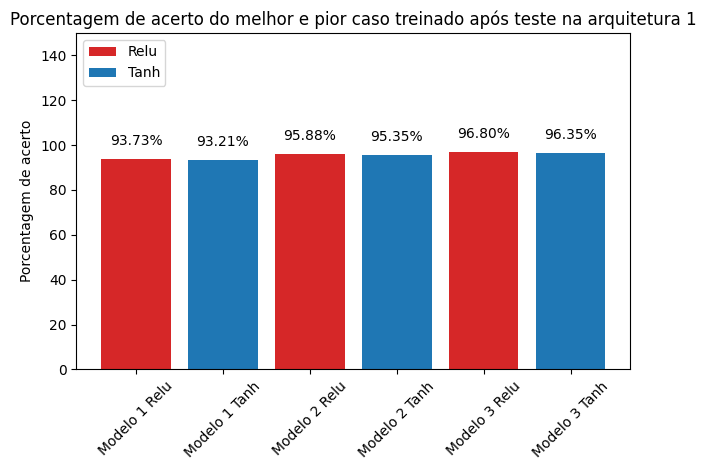

In [ ]:
# Plotando a diferença de porcentagem entre os modelos da arquitetura 1

fig, ax = plt.subplots()

activation_types = ['Relu', 'Tanh'] * 3
model_names = ['Modelo 1', 'Modelo 1', 'Modelo 2', 'Modelo 2', 'Modelo 3', 'Modelo 3']

values = []
bar_colors = []

for model in A1_trained:
    accuracy = model.evaluate(val_images, val_labels)[1] * 100
    values.append(accuracy)

    # Assigning colors based on activation type
    for _ in range(2):
        bar_colors.extend(['tab:red', 'tab:blue'])

# Creating labels for each model and activation type
case_ = [f'{model} {act}' for model, act in zip(model_names, activation_types)]

bars = ax.bar(case_, values, color=bar_colors)

ax.set_ylabel('Porcentagem de acerto')
ax.set_title('Porcentagem de acerto do melhor e pior caso treinado após teste na arquitetura 1')

ax.set_ylim(0, 150)

for i, val in enumerate(values):
    ax.text(i, val + 5, f'{val:.2f}%', ha='center', va='bottom')

# Creating a custom legend for red and blue bars
red_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:red", edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
ax.legend([red_patch, blue_patch], ['Relu', 'Tanh'], loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


##### Arquitetura 2

313/313 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9639


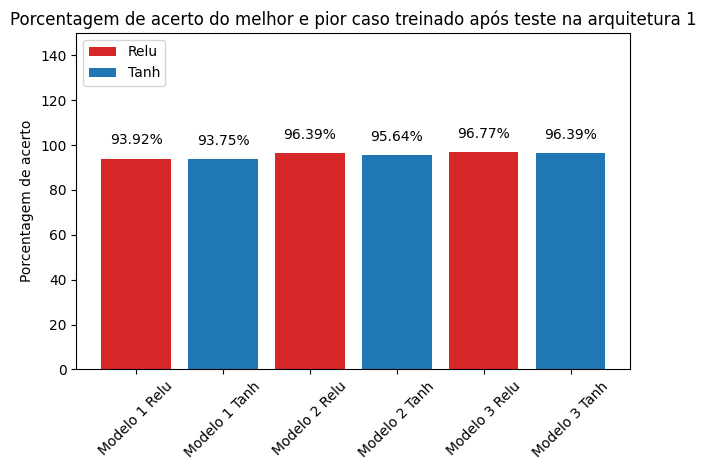

In [ ]:
# Plotando a diferença de porcentagem entre os modelos da arquitetura 2

fig, ax = plt.subplots()

activation_types = ['Relu', 'Tanh'] * 3
model_names = ['Modelo 1', 'Modelo 1', 'Modelo 2', 'Modelo 2', 'Modelo 3', 'Modelo 3']

values = []
bar_colors = []

for model in A2_trained:
    accuracy = model.evaluate(val_images, val_labels)[1] * 100
    values.append(accuracy)

    # Assigning colors based on activation type
    for _ in range(2):
        bar_colors.extend(['tab:red', 'tab:blue'])

# Creating labels for each model and activation type
case_ = [f'{model} {act}' for model, act in zip(model_names, activation_types)]

bars = ax.bar(case_, values, color=bar_colors)

ax.set_ylabel('Porcentagem de acerto')
ax.set_title('Porcentagem de acerto do melhor e pior caso treinado após teste na arquitetura 2')

ax.set_ylim(0, 150)

for i, val in enumerate(values):
    ax.text(i, val + 5, f'{val:.2f}%', ha='center', va='bottom')

# Creating a custom legend for red and blue bars
red_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:red", edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
ax.legend([red_patch, blue_patch], ['Relu', 'Tanh'], loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

##### Arquitetura 3

313/313 [==============================] - 1s 3ms/step - loss: 0.1467 - accuracy: 0.9686


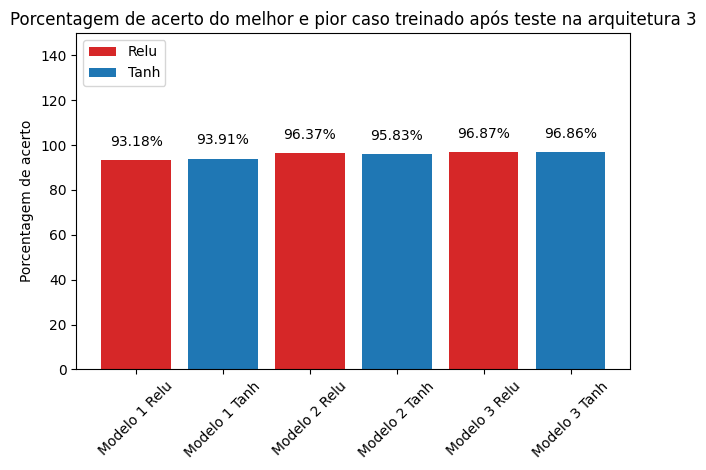

In [ ]:
# Plotando a diferença de porcentagem entre os modelos da arquitetura 3

fig, ax = plt.subplots()

activation_types = ['Relu', 'Tanh'] * 3
model_names = ['Modelo 1', 'Modelo 1', 'Modelo 2', 'Modelo 2', 'Modelo 3', 'Modelo 3']

values = []
bar_colors = []

for model in A3_trained:
    accuracy = model.evaluate(val_images, val_labels)[1] * 100
    values.append(accuracy)

    # Assigning colors based on activation type
    for _ in range(2):
        bar_colors.extend(['tab:red', 'tab:blue'])

# Creating labels for each model and activation type
case_ = [f'{model} {act}' for model, act in zip(model_names, activation_types)]

bars = ax.bar(case_, values, color=bar_colors)

ax.set_ylabel('Porcentagem de acerto')
ax.set_title('Porcentagem de acerto do melhor e pior caso treinado após teste na arquitetura 3')

ax.set_ylim(0, 150)

for i, val in enumerate(values):
    ax.text(i, val + 5, f'{val:.2f}%', ha='center', va='bottom')

# Creating a custom legend for red and blue bars
red_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:red", edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
ax.legend([red_patch, blue_patch], ['Relu', 'Tanh'], loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

#### Comparando todos os resultados por modelos

In [ ]:
# Selecionando pelos modelos
M1_trained = []
M2_trained = []
M3_trained = []

for idx in range(18):
  if idx % 3 == 0:
    M1_trained.append(trained[idx])
  elif idx % 3 == 1:
    M2_trained.append(trained[idx])
  elif idx % 3 == 2:
    M3_trained.append(trained[idx])


##### Modelo 1

313/313 [==============================] - 1s 2ms/step - loss: 0.1550 - accuracy: 0.9583


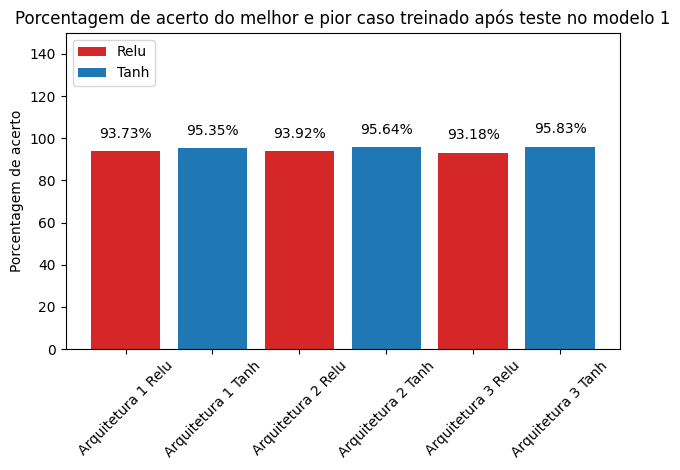

In [ ]:
# Plotando a diferença de porcentagem entre os modelos do modelo 1

fig, ax = plt.subplots()

activation_types = ['Relu', 'Tanh'] * 3
model_names = ['Arquitetura 1', 'Arquitetura 1', 'Arquitetura 2', 'Arquitetura 2', 'Arquitetura 3', 'Arquitetura 3']

values = []
bar_colors = []

for model in M1_trained:
    accuracy = model.evaluate(val_images, val_labels)[1] * 100
    values.append(accuracy)

    # Assigning colors based on activation type
    for _ in range(2):
        bar_colors.extend(['tab:red', 'tab:blue'])

# Creating labels for each model and activation type
case_ = [f'{model} {act}' for model, act in zip(model_names, activation_types)]

bars = ax.bar(case_, values, color=bar_colors)

ax.set_ylabel('Porcentagem de acerto')
ax.set_title('Porcentagem de acerto do melhor e pior caso treinado após teste no modelo 1')

ax.set_ylim(0, 150)

for i, val in enumerate(values):
    ax.text(i, val + 5, f'{val:.2f}%', ha='center', va='bottom')

# Creating a custom legend for red and blue bars
red_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:red", edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
ax.legend([red_patch, blue_patch], ['Relu', 'Tanh'], loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


##### Modelo 2

313/313 [==============================] - 1s 2ms/step - loss: 0.1206 - accuracy: 0.9687


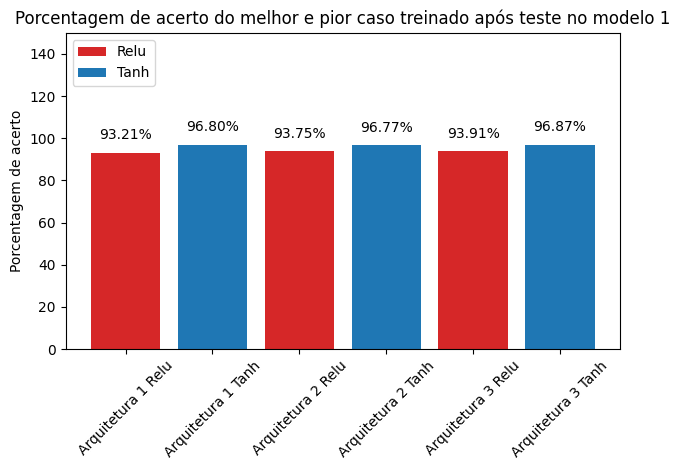

In [ ]:
# Plotando a diferença de porcentagem entre os modelos do modelo 1

fig, ax = plt.subplots()

activation_types = ['Relu', 'Tanh'] * 3
model_names = ['Arquitetura 1', 'Arquitetura 1', 'Arquitetura 2', 'Arquitetura 2', 'Arquitetura 3', 'Arquitetura 3']

values = []
bar_colors = []

for model in M2_trained:
    accuracy = model.evaluate(val_images, val_labels)[1] * 100
    values.append(accuracy)

    # Assigning colors based on activation type
    for _ in range(2):
        bar_colors.extend(['tab:red', 'tab:blue'])

# Creating labels for each model and activation type
case_ = [f'{model} {act}' for model, act in zip(model_names, activation_types)]

bars = ax.bar(case_, values, color=bar_colors)

ax.set_ylabel('Porcentagem de acerto')
ax.set_title('Porcentagem de acerto do melhor e pior caso treinado após teste no modelo 2')

ax.set_ylim(0, 150)

for i, val in enumerate(values):
    ax.text(i, val + 5, f'{val:.2f}%', ha='center', va='bottom')

# Creating a custom legend for red and blue bars
red_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:red", edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
ax.legend([red_patch, blue_patch], ['Relu', 'Tanh'], loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


##### Model 3

313/313 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9639


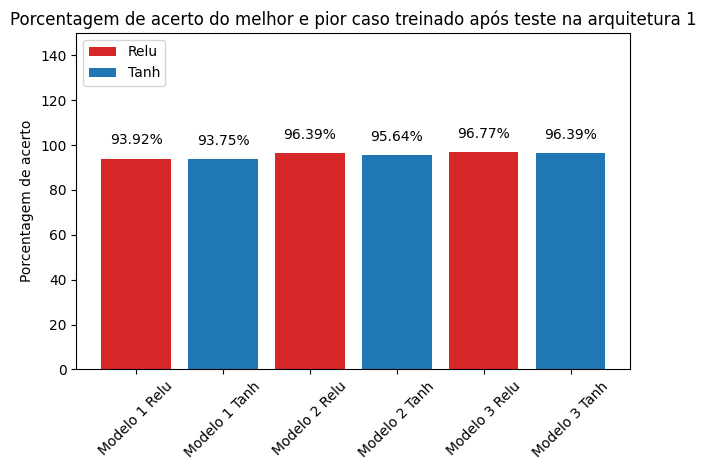

In [ ]:
# Plotando a diferença de porcentagem entre os modelos do modelo 3

fig, ax = plt.subplots()

activation_types = ['Relu', 'Tanh'] * 3
model_names = ['Arquitetura 1', 'Arquitetura 1', 'Arquitetura 2', 'Arquitetura 2', 'Arquitetura 3', 'Arquitetura 3']

values = []
bar_colors = []

for model in M3_trained:
    accuracy = model.evaluate(val_images, val_labels)[1] * 100
    values.append(accuracy)

    # Assigning colors based on activation type
    for _ in range(2):
        bar_colors.extend(['tab:red', 'tab:blue'])

# Creating labels for each model and activation type
case_ = [f'{model} {act}' for model, act in zip(model_names, activation_types)]

bars = ax.bar(case_, values, color=bar_colors)

ax.set_ylabel('Porcentagem de acerto')
ax.set_title('Porcentagem de acerto do melhor e pior caso treinado após teste no modelo 3')

ax.set_ylim(0, 150)

for i, val in enumerate(values):
    ax.text(i, val + 5, f'{val:.2f}%', ha='center', va='bottom')

# Creating a custom legend for red and blue bars
red_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:red", edgecolor='none')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
ax.legend([red_patch, blue_patch], ['Relu', 'Tanh'], loc='upper left')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


## Encontrando o melhor e o pior

### Encontrando o melhor e pior dos modelos

In [ ]:
# Comparando o modelos treinados

highest = float(0.0)     # Inicializa com -infinito
lowest = float(1.0)      # Inicializa com +infinito
indice = int(0)          # Inicializa o contador em 0

for model in trained:
  accuracy = model.evaluate(val_images, val_labels)[1]
  if accuracy > highest:
    best = model
    highest = accuracy
    best_i = indice
  if accuracy < lowest:
    worst = model
    lowest = accuracy
    worst_i = indice

  indice += 1

313/313 [==============================] - 1s 2ms/step - loss: 0.1467 - accuracy: 0.9686


### Comparação do melhor e pior modelos

In [ ]:
def generate_name(num):
    if num < 0 or num > 17:
        return "Invalid number"

    str1 = "Arquitetura 1 " if num >= 0 and num <= 5 else "Arquitetura 2 " if num >= 6 and num <= 11 else "Arquitetura 3 "
    str2 = (
        "Modelo 1 " if (num >= 0 and num <= 1) or (num >= 6 and num <= 7) or (num >= 12 and num <= 13)
        else "Modelo 2 " if (num >= 2 and num <= 3) or (num >= 8 and num <= 9) or (num >= 14 and num <= 15)
        else "Modelo 3 "
    )
    str3 = "Relu" if num % 2 == 0 else "Tanh"

    return str1 + str2 + str3

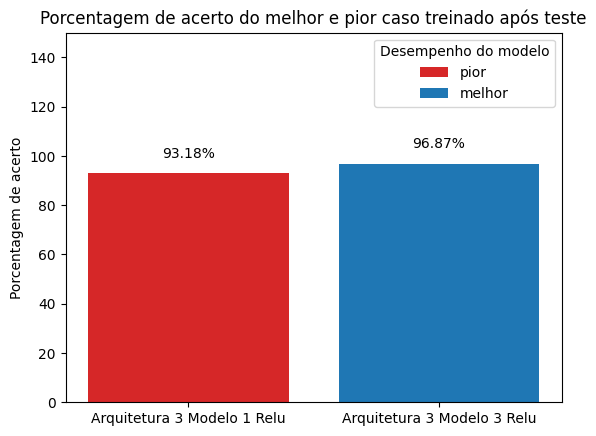

In [ ]:
# Plotando a diferença de porcentagem entre os modelos

fig, ax = plt.subplots()

case_ = [generate_name(worst_i), generate_name(best_i)]
values = [lowest*100, highest*100]
bar_labels = ['pior','melhor']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(case_, values, label=bar_labels, color=bar_colors)

ax.legend(title='Desempenho do modelo')
ax.set_ylabel('Porcentagem de acerto')
ax.set_title('Porcentagem de acerto do melhor e pior caso treinado após teste')

ax.set_ylim(0, 150)

for i, val in enumerate(values):
  ax.text(i, val + 5, f'{val:.2f}%', ha='center', va='bottom')

plt.show()

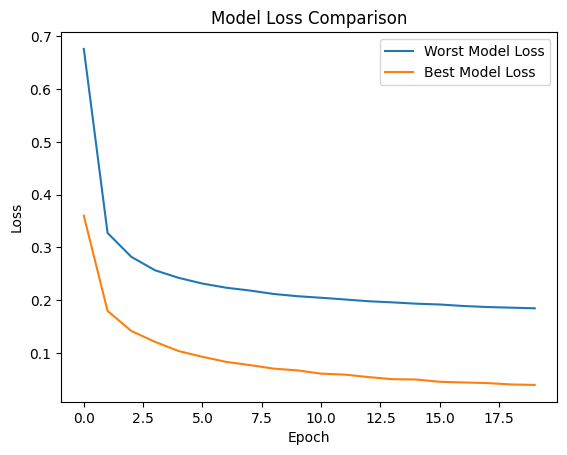

In [ ]:
# Plotando o loss do pior e melhor modelo

plt.plot(models_history[worst_i].history['loss'], label='Worst Model Loss')
plt.plot(models_history[best_i].history['loss'], label='Best Model Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

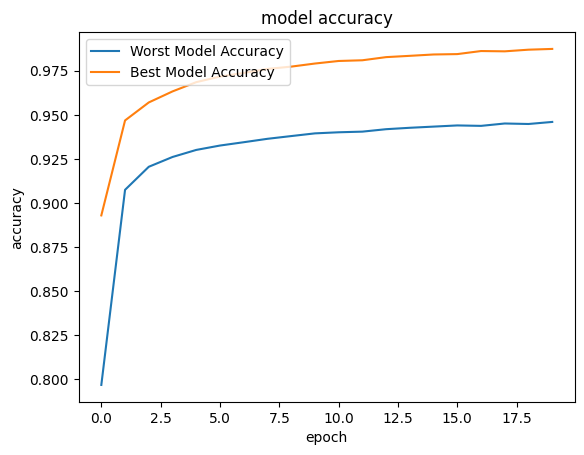

In [ ]:
# Plotando o loss do pior e melhor modelo

plt.plot(models_history[worst_i].history['accuracy'], label='Worst Model Accuracy')
plt.plot(models_history[best_i].history['accuracy'], label='Best Model Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

### Mostrando erros do melhor e pior modelos

In [ ]:
# Salvando os resultados das classificações

classifications_best = best.predict(val_images)

classifications_worst = worst.predict(val_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Achando os resultados incorretos de ambos os modelos após análise

predict_errors_best = []
for i in range(len(val_labels)):
  predicted_label = np.argmax(classifications_best[i])
  if predicted_label != val_labels[i]:
    predict_errors_best.append(i)

predict_errors_worst = []
for i in range(len(val_labels)):
  predicted_label = np.argmax(classifications_worst[i])
  if predicted_label != val_labels[i]:
    predict_errors_worst.append(i)

In [ ]:
# Vendo o tamanho do vetor dos erros de ambos os modelos

tam_worst = len(predict_errors_worst)
tam_best = len(predict_errors_best)

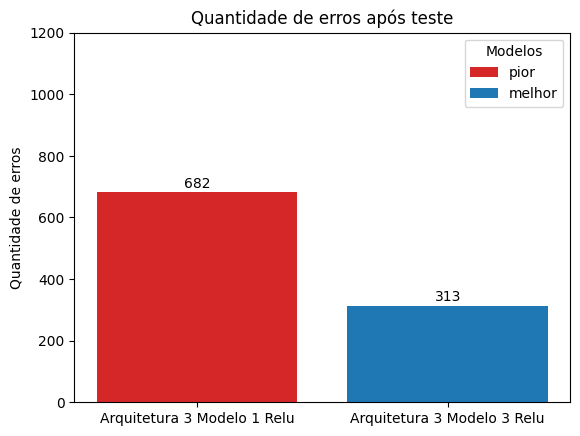

In [ ]:
# Plotando a quantidade de erros no pior e melhor modelos

fig, ax = plt.subplots()

case_ = [generate_name(worst_i), generate_name(best_i)]
values = [tam_worst, tam_best]
bar_labels = ['pior', 'melhor']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(case_, values, label=bar_labels, color=bar_colors)

ax.legend(title='Modelos')
ax.set_ylabel('Quantidade de erros')
ax.set_title('Quantidade de erros após teste')

ax.set_ylim(0, 1200)

for i, val in enumerate(values):
  ax.text(i, val + 5, f'{val}', ha='center', va='bottom')

plt.show()

### Testando os erros

    Real label of image 290 is: 8
 Predict label of image 290 is: 4


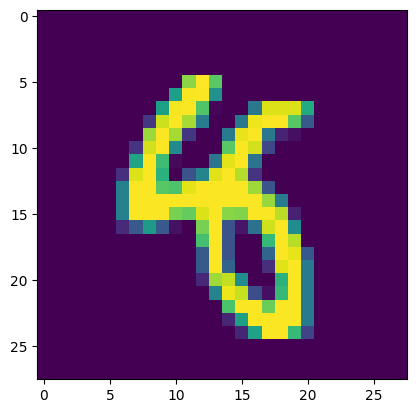

In [ ]:
# Mude o valor de ind para testar cada erro do modelos
# Mude o valor de t para testar para cada modelo

see_best = 1 # mude aqui para 1 para ver os erros do melhor modelo, 0 para os erros do pior modelo
ind = 8      # mude aqui para escolher uma imagem especifíca, veja a tabela acima para saber até onde esse valor pode ir dependendo do modelo. Valor max de ind = 1 até n erros

ind -= 1
if (see_best == 1):
  i = predict_errors_best[ind]
  c = classifications_best[i]
else:
  i = predict_errors_worst[ind]
  c = classifications_best[i]

predicted_label = np.argmax(c)
print("    Real label of image {} is: {}".format(i, val_labels[i]))
print(" Predict label of image {} is: {}".format(i, predicted_label))
plt.imshow(val_images[i]);

## Resultados

É possivel ver claramente pelos resultados que nesse caso a maior quantidade de neurônios acaba por trazer resultados melhores na maioria das situações, assim como quanto mais camadas. Também se torna clara a superioridade em todos os casos do uso do Relu, ela se mostrou-se eficaz ao lidar com a não-linearidade dos dados. Para um maior número de camadas, menos neurônios são bem menos eficazes e mais neurônios bem mais também.